Train path: C:\Users\manos\Desktop\BDA\BasketDataAnalysisV2\2012-18_teamBoxScore.csv


C:\Users\manos\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manos\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ready



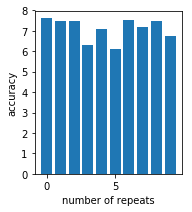

In [2]:
def do_sth(pred,dataset):
    array_plot=[]
    import numpy as np
    pred=np.ravel(pred)
    for x in range(10):
        from sklearn.model_selection import train_test_split
        dataset_train, dataset_test, pred_train, pred_real=train_test_split(dataset,pred,test_size=0.2,random_state=42)
        from sklearn.neural_network import MLPClassifier
        LR=MLPClassifier(hidden_layer_sizes=(100,100,100)).fit(dataset_train,pred_train);
        pred_test=LR.predict(dataset_test)
        from sklearn.metrics import accuracy_score
        array_plot.append(accuracy_score(pred_real,pred_test))
    return array_plot

#C:\Users\manos\Desktop\BDA\BasketDataAnalysisV2\2012-18_teamBoxScore.csv
import pandas as pd
dataset=pd.read_csv(input('Train path: '))
dataset=dataset[['gmDate','gmTime','teamAbbr','teamRslt','teamMin','teamDayOff','teamAST','teamTO','teamSTL','teamBLK','teamPF','teamFGA','teamORB','teamDRB']]
from sklearn.preprocessing import LabelEncoder
transforms=['gmDate','gmTime','teamAbbr','teamRslt']
le=[]
for i in range(4):
    le.append(LabelEncoder())
    world=transforms[i]
    le[i].fit(dataset[[world]])
    dataset[[world]]=le[i].transform(dataset[[world]])
pred=dataset[['teamRslt']]
dataset=(dataset.drop(columns=['teamRslt']))
ds=do_sth(pred,dataset)
y=[x*10 for x in ds]
import matplotlib.pyplot as plt
print('Ready\n')
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(range(10), y)
plt.xlabel('number of repeats')
plt.ylabel('accuracy')
plt.show()

    
